# Homework 3 - Immigration, the stock market, and GDP

The objective of this homework is to practice working with Pandas Dataframes. To successfully complete this homework, you may use any resources available to you. 

Answer the following question: What has a higher correlation with the GDP in the US: stock market returns or immigration?

You need to accomplish the following tasks:
1. Install the [wbdata](http://wbdata.readthedocs.io/en/latest/) package for API access to Worldbank data.
2. Explore the databases `Population estimates and projections`, `Global Financial Development`, and `World Development Indicators`.
3. Get the data on `GDP per capita growth (annual %)` as a dataframe.
4. Get the data on `Net immigration` as a dataframe (Make sure that you also have a percentage value for this). 
5. Get the data on `Stock market return (%, year-on-year)` as a dataframe.
5. Explore the data and note the issues. 
5. Clean and combine the data.
6. What is the correlation between the GDP and net immigration and stock market returns. 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install wbdata

In [3]:
import pandas as pd
import wbdata as wb

In [ ]:
wb.get_source()

In [ ]:
wb.get_indicator(source=32)

In [78]:
gdp = {'NY.GDP.PCAP.KD.ZG':'World Development Indicators'}
im = {'SM.POP.NETM': 'Population estimates and projections'}
pop = {'SP.POP.TOTL':'Population estimates and projections'}
stock = {'GFDD.OM.02': 'Global Financial Development'}

stock_data = wb.get_dataframe(stock, country='USA', convert_date=True)
gdp_data = wb.get_dataframe(gdp, country='USA', convert_date=True)
im_data = wb.get_dataframe(im, country='USA', convert_date=True)
pop_data = wb.get_dataframe(pop, country='USA', convert_date=True)

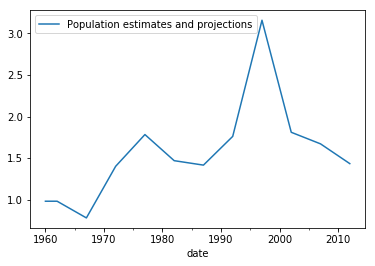

In [94]:
im = (im_data/pop_data)*100
im = im.interpolate()
im.plot()

In [95]:
comb_results = pd.concat([gdp_data, im, stock_data], axis=1)
names = ['GDtP_Percentage', 'Immi', 'Returns_Percentage']
comb_results.columns = names

In [97]:
comb_results.head()

,GDP_Percentage,Immi,Returns_Percentage
date,,,
1960-01-01,NaN,0.980644,NaN
1961-01-01,0.618121,0.980644,18.67
1962-01-01,4.480669,0.980644,-5.96
1963-01-01,2.908272,0.940466,12.10
1964-01-01,4.340549,0.900288,16.48


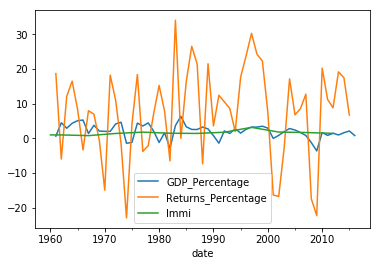

In [102]:
%matplotlib inline
comb_results[['GDP_Percentage','Returns_Percentage','Immi']].plot()

In [103]:
comb_results[['GDP_Percentage','Returns_Percentage','Immi']].corr()

,GDP_Percentage,Returns_Percentage,Immi
GDP_Percentage,1.000000,0.320460,-0.074788
Returns_Percentage,0.320460,1.000000,0.238076
Immi,-0.074788,0.238076,1.000000
